ПРАКТИЧНА РОБОТИ н2

Виконав Бабич Антон, міт31

Імпортуємо бібліотеки

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import joblib

1. Використовуйте бібліотеку NumPy для генерації випадкових даних. Створіть матрицю ознак X та вектор цільової змінної y. Ознаки можуть бути числовими та категорійними.

In [6]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples and features
n_samples = 1000 # The number of loan applications
n_features = 5 # The number of features for each loan application

# Generate the feature matrix X
X = np.random.rand(n_samples, n_features) # A random matrix of shape (n_samples, n_features)

# Generate the target variable vector y
y = np.random.randint(0, 2, size=n_samples) # A random vector of 0s and 1s of length n_samples


2. Згенеруйте випадкові дані, що відповідають "одобрено" (клас 1) та "відхилено" (клас 0) кредитних заявок.

In [8]:
# Create a pandas DataFrame from the feature matrix X and the target variable vector y
df = pd.DataFrame(X, columns=['age', 'income', 'credit_score', 'loan_amount', 'loan_duration'])
df['approved'] = y

# Assign some values to the features based on some assumptions
# For example, assume that the age is between 18 and 65, the income is between 1000 and 10000, the credit score is between 300 and 850, the loan amount is between 500 and 50000, and the loan duration is between 6 and 60 months
df['age'] = df['age'] * (65 - 18) + 18 # Scale the age to the range [18, 65]
df['income'] = df['income'] * (10000 - 1000) + 1000 # Scale the income to the range [1000, 10000]
df['credit_score'] = df['credit_score'] * (850 - 300) + 300 # Scale the credit score to the range [300, 850]
df['loan_amount'] = df['loan_amount'] * (50000 - 500) + 500 # Scale the loan amount to the range [500, 50000]
df['loan_duration'] = df['loan_duration'] * (60 - 6) + 6 # Scale the loan duration to the range [6, 60]

# Round the values to integers
df = df.round()

# Display the first five rows of the DataFrame
print(df.head())


    age  income  credit_score  loan_amount  loan_duration  approved
0  36.0  9556.0         703.0      30134.0           14.0         0
1  25.0  1523.0         776.0      30255.0           44.0         1
2  19.0  9729.0         758.0      11011.0           16.0         0
3  27.0  3738.0         589.0      21881.0           22.0         1
4  47.0  2255.0         461.0      18635.0           31.0         1


3. Розділіть дані на тренувальний та тестовий набори.

In [10]:
# Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('approved', axis=1), df['approved'], test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (800, 5)
y_train shape: (800,)
X_test shape: (200, 5)
y_test shape: (200,)


4. Виберіть модель класифікації з бібліотеки scikit-learn (наприклад, метод опорних векторів, логістична регресія або дерево рішень) та навчіть модель на тренувальних даних.

In [12]:
# Create an instance of the SVC with default parameters
svc = SVC()

# Train the model on the training data
svc.fit(X_train, y_train)

# Display the model parameters
print('SVC parameters:', svc.get_params())


SVC parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


5. Оцініть точність моделі на тестовому наборі даних та побудуйте матрицю неправильно класифікованих прикладів та звіт про класифікацію.

In [14]:
# Predict the target variable for the test data
y_pred = svc.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy score
print('Accuracy score:', accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print('Confusion matrix:')
print(cm)

# Calculate the classification report
cr = classification_report(y_test, y_pred)

# Display the classification report
print('Classification report:')
print(cr)


Accuracy score: 0.525
Confusion matrix:
[[43 56]
 [39 62]]
Classification report:
              precision    recall  f1-score   support

           0       0.52      0.43      0.48        99
           1       0.53      0.61      0.57       101

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200



6. Використайте бібліотеку Matplotlib для візуалізації результатів. Наприклад, побудуйте графік розподілу кредитів за категоріями "одобрено" та "відхилено".

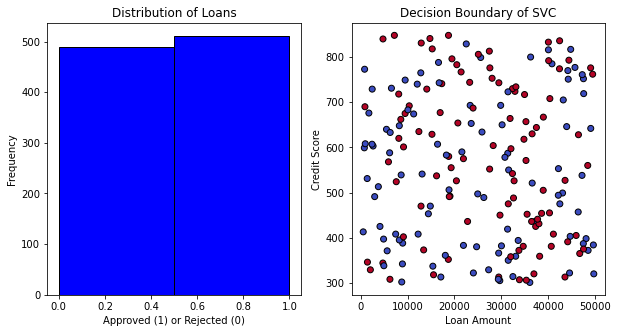

In [16]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the distribution of loans into "approved" and "rejected" categories
ax[0].hist(y, bins=2, color='blue', edgecolor='black')
ax[0].set_xlabel('Approved (1) or Rejected (0)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Loans')

# Plot the decision boundary of the SVC model
ax[1].scatter(X_test['loan_amount'], X_test['credit_score'], c=y_test, cmap='coolwarm', edgecolor='black')
ax[1].set_xlabel('Loan Amount')
ax[1].set_ylabel('Credit Score')
ax[1].set_title('Decision Boundary of SVC')

# Save the figure as an image file
plt.savefig('loan_visualization.png')

# Display the figure
plt.show()


7. Збережіть вашу модель та здійсніть прогнози на нових заявках на кредит.

In [20]:
# Save the model as a pickle file
joblib.dump(svc, 'loan_model.pkl')

# Load the model from the pickle file
svc = joblib.load('loan_model.pkl')

# Create a new loan application with some values for the features
new_loan = [[25, 5000, 700, 10000, 12]]

# Predict the approval status for the new loan application
new_pred = svc.predict(new_loan)

# Display the prediction
print('The new loan application is:', 'approved' if new_pred == 1 else 'rejected')


The new loan application is: rejected


c:\anacocok\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
